# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Read Data

In [2]:
support_df = pd.read_csv('support2.csv')
support_df.head()

,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,...,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,11.0,...,1.199951,141.0,7.459961,NaN,NaN,NaN,7.0,7.0,NaN,7.0
2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,...,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,<2 mo. follow-up,1.0
3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,...,2.000000,134.0,7.459961,NaN,NaN,NaN,1.0,0.0,<2 mo. follow-up,0.0
4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,11.0,...,0.799927,139.0,NaN,NaN,NaN,NaN,0.0,0.0,no(M2 and SIP pres),0.0
5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,...,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,no(M2 and SIP pres),2.0


# Data preprocessing

## Missing values

### Removing missing values

In [3]:
support_df.isna().sum()

age            0
death          0
sex            0
hospdead       0
slos           0
d.time         0
dzgroup        0
dzclass        0
num.co         0
edu         1634
income      2982
scoma          1
charges      172
totcst       888
totmcst     3475
avtisst       82
race          42
sps            1
aps            1
surv2m         1
surv6m         1
hday           0
diabetes       0
dementia       0
ca             0
prg2m       1649
prg6m       1633
dnr           30
dnrday        30
meanbp         1
wblc         212
hrt            1
resp           1
temp           1
pafi        2325
alb         3372
bili        2601
crea          67
sod            1
ph          2284
glucose     4500
bun         4352
urine       4862
adlp        5641
adls        2867
sfdm2       1400
adlsc          0
dtype: int64

In [4]:
support_no_na_df = support_df.dropna()
print(f"Shape of original dataframe: {support_df.shape}, Shape after droping na from dataframe: {support_no_na_df.shape}")

Shape of original dataframe: (9105, 47), Shape after droping na from dataframe: (306, 47)


In [5]:
support_no_na_df = support_df.dropna(how='all')
print(f"Shape of original dataframe: {support_df.shape}, Shape after droping na from dataframe: {support_no_na_df.shape}")

Shape of original dataframe: (9105, 47), Shape after droping na from dataframe: (9105, 47)


In [6]:
support_no_na_df = support_df.dropna(thresh=42)
print(f"Shape of original dataframe: {support_df.shape}, Shape after droping na from dataframe: {support_no_na_df.shape}")

Shape of original dataframe: (9105, 47), Shape after droping na from dataframe: (5164, 47)


In [7]:
support_df = support_no_na_df.copy()
support_df.isna().sum()

age            0
death          0
sex            0
hospdead       0
slos           0
d.time         0
dzgroup        0
dzclass        0
num.co         0
edu          332
income      1002
scoma          0
charges       61
totcst       433
totmcst      842
avtisst       53
race           2
sps            0
aps            0
surv2m         0
surv6m         0
hday           0
diabetes       0
dementia       0
ca             0
prg2m        345
prg6m        343
dnr            3
dnrday         3
meanbp         0
wblc          51
hrt            0
resp           0
temp           0
pafi         829
alb         1337
bili         943
crea           1
sod            0
ph           812
glucose     1369
bun         1302
urine       1658
adlp        2798
adls         949
sfdm2        445
adlsc          0
dtype: int64

In [8]:
support_no_na_df = support_df.dropna(axis = 1)
print(f"Shape of original dataframe: {support_df.shape}, Shape after droping na from dataframe: {support_no_na_df.shape}")

Shape of original dataframe: (5164, 47), Shape after droping na from dataframe: (5164, 24)


In [9]:
support_no_na_df = support_df.dropna(axis = 1, how = 'all')
print(f"Shape of original dataframe: {support_df.shape}, Shape after droping na from dataframe: {support_no_na_df.shape}")

Shape of original dataframe: (5164, 47), Shape after droping na from dataframe: (5164, 47)


In [10]:
support_no_na_df = support_df.dropna(axis = 1, thresh=4500)
print(f"Shape of original dataframe: {support_df.shape}, Shape after droping na from dataframe: {support_no_na_df.shape}")

Shape of original dataframe: (5164, 47), Shape after droping na from dataframe: (5164, 36)


In [11]:
support_df = support_no_na_df.copy()
support_df.isna().sum()

age           0
death         0
sex           0
hospdead      0
slos          0
d.time        0
dzgroup       0
dzclass       0
num.co        0
edu         332
scoma         0
charges      61
totcst      433
avtisst      53
race          2
sps           0
aps           0
surv2m        0
surv6m        0
hday          0
diabetes      0
dementia      0
ca            0
prg2m       345
prg6m       343
dnr           3
dnrday        3
meanbp        0
wblc         51
hrt           0
resp          0
temp          0
crea          1
sod           0
sfdm2       445
adlsc         0
dtype: int64

### Handling missing values

In [12]:
quantitative_cols = ['age', 'slos', 'd.time', 'num.co', 'scoma', 'charges', 'totcst', 'avtisst', 'sps', 'aps', 'surv2m', 'surv6m', 'hday', 'diabetes',
                     'dementia', 'prg2m', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'crea', 'sod', 'adlsc']
len(quantitative_cols)

25

In [13]:
qualitative_cols = list(support_df.columns[~support_df.columns.isin(quantitative_cols)])
len(qualitative_cols)

11

In [14]:
print(qualitative_cols)

['death', 'sex', 'hospdead', 'dzgroup', 'dzclass', 'edu', 'race', 'ca', 'prg6m', 'dnr', 'sfdm2']


#### Quantitative Data

In [15]:
support_df[quantitative_cols] = support_df[quantitative_cols].fillna(support_df[quantitative_cols].rolling(171, min_periods=1,center=True).mean())
support_df[quantitative_cols].isna().sum()

age         0
slos        0
d.time      0
num.co      0
scoma       0
charges     0
totcst      0
avtisst     0
sps         0
aps         0
surv2m      0
surv6m      0
hday        0
diabetes    0
dementia    0
prg2m       0
dnrday      0
meanbp      0
wblc        0
hrt         0
resp        0
temp        0
crea        0
sod         0
adlsc       0
dtype: int64

#### Qalitative Data

In [16]:
support_df[qualitative_cols] = support_df[qualitative_cols].ffill()
support_df.isna().sum()

age         0
death       0
sex         0
hospdead    0
slos        0
d.time      0
dzgroup     0
dzclass     0
num.co      0
edu         0
scoma       0
charges     0
totcst      0
avtisst     0
race        0
sps         0
aps         0
surv2m      0
surv6m      0
hday        0
diabetes    0
dementia    0
ca          0
prg2m       0
prg6m       0
dnr         0
dnrday      0
meanbp      0
wblc        0
hrt         0
resp        0
temp        0
crea        0
sod         0
sfdm2       0
adlsc       0
dtype: int64

# Statistical Analysis

In [17]:
support_df.describe()

,age,death,hospdead,slos,d.time,num.co,edu,scoma,charges,totcst,...,prg6m,dnrday,meanbp,wblc,hrt,resp,temp,crea,sod,adlsc
count,5164.000000,5164.000000,5164.000000,5164.000000,5164.000000,5164.000000,5164.000000,5164.000000,5.164000e+03,5164.000000,...,5164.000000,5164.000000,5164.000000,5164.000000,5164.000000,5164.000000,5164.000000,5164.000000,5164.000000,5164.000000
mean,62.506439,0.638846,0.243997,18.034276,443.354183,1.992060,11.663826,11.186483,5.974864e+04,30720.400230,...,0.513153,14.858887,85.304415,12.786581,98.785438,23.555964,37.112086,1.813315,137.652401,1.740881
std,15.701768,0.480382,0.429532,20.978286,491.993595,1.411106,3.406605,23.381804,1.009352e+05,42580.325595,...,0.299809,19.686173,28.547358,9.396864,31.902641,9.869739,1.289314,1.758426,6.164871,2.121305
min,18.118990,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1.169000e+03,0.000000,...,0.000000,-39.000000,0.000000,0.000000,0.000000,0.000000,31.699220,0.099991,110.000000,0.000000
25%,52.507985,0.000000,0.000000,7.000000,30.000000,1.000000,10.000000,0.000000,1.050025e+04,6757.481425,...,0.250000,5.000000,63.000000,7.299805,72.000000,16.000000,36.093750,0.899902,134.000000,0.000000
50%,64.808990,1.000000,0.000000,11.000000,269.500000,2.000000,12.000000,0.000000,2.621050e+04,17031.076798,...,0.500000,9.000000,77.000000,11.099609,104.000000,24.000000,36.695310,1.199951,137.000000,1.000000
75%,74.000213,1.000000,0.000000,20.000000,708.000000,3.000000,13.000000,9.000000,6.416525e+04,35867.328125,...,0.750000,17.000000,109.000000,15.798828,120.000000,29.000000,38.195310,1.899902,141.000000,3.000000
max,101.847960,1.000000,1.000000,285.000000,2029.000000,9.000000,31.000000,100.000000,1.226766e+06,483556.250000,...,1.000000,285.000000,195.000000,200.000000,300.000000,76.000000,41.195310,21.500000,175.000000,7.000000


## Correlation analysis for continuous variable

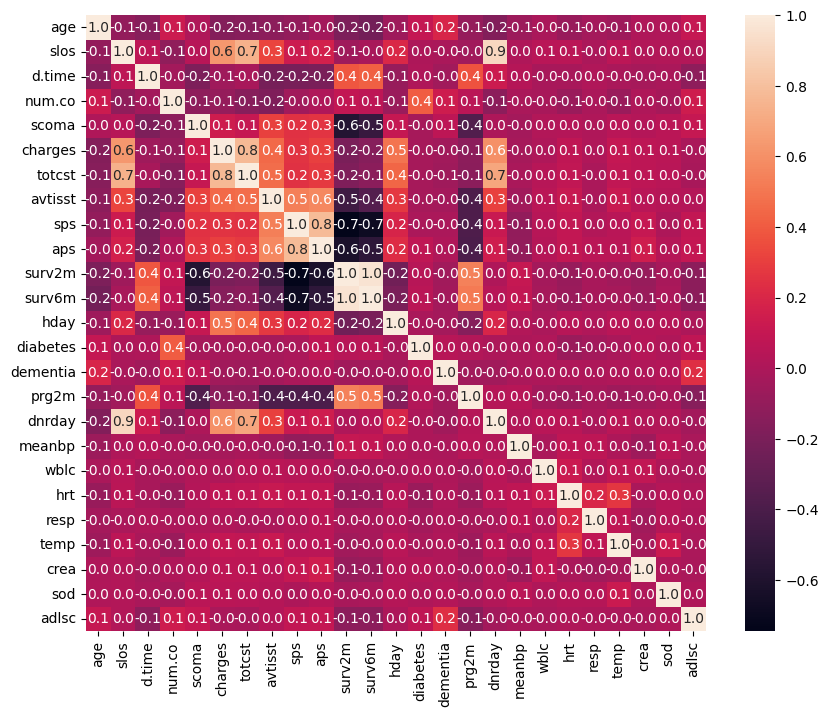

In [18]:
fig = plt.figure(figsize=(10, 8))
ax = sns.heatmap(support_df[quantitative_cols].corr(), annot=True, fmt='.1f')

## Spearman's rank correlation

In [19]:
stats.spearmanr(support_df['slos'], support_df['num.co'])

SignificanceResult(statistic=-0.14071353350929405, pvalue=2.9922699620056443e-24)

## Two sample t-test for difference between continuous and categorical variable

### Small introduction

**Null hypothesis (H0):** There is no significant difference between A and B.  
**Alternative hypothesis (H1):** There is a significant difference between A and B.

In [20]:
A = np.array([301, 298, 295, 297, 304, 305, 309, 298, 291, 299, 293, 304])
B = np.array([301, 298, 295, 297, 304, 305, 309, 298, 291, 299, 293, 304])
A.mean(), B.mean()

(299.5, 299.5)

In [21]:
stats.ttest_ind(a=A, b=B)

TtestResult(statistic=0.0, pvalue=1.0, df=22.0)

The test yields a p-value of **1.0** is greater than 0.05. So, we accept null hypothesis.

In [22]:
B = np.array([302, 309, 324, 313, 312, 310, 305, 298, 299, 300, 289, 294])
A.mean(), B.mean()

(299.5, 304.5833333333333)

In [23]:
stats.ttest_ind(a=A, b=B)

TtestResult(statistic=-1.6087611853147312, pvalue=0.12192597112398221, df=22.0)

The test yields a p-value of **0.12** is greater than 0.05. So, we accept null hypothesis.

In [24]:
B = np.array([302, 309, 324, 313, 312, 310, 305, 298, 299, 300, 289, 304, 312])
A.mean(), B.mean()

(299.5, 305.9230769230769)

In [25]:
stats.ttest_ind(a=A, b=B)

TtestResult(statistic=-2.1870187507128627, pvalue=0.039169478324235264, df=23.0)

The test yields a p-value of **0.03** is less than 0.05. So, we accept null hypothesis.

### Difference in age between patients who died and those who survived

In [26]:
age_lived = support_df[support_df['death'] == 0]
age_died = support_df[support_df['death'] == 1]
len(age_lived), len(age_died)

(1865, 3299)

In [27]:
age_lived = age_lived.sample(1500)
age_died = age_died.sample(1500)
age_lived['age'].mean(), age_died['age'].mean()

(58.74982321333334, 64.79357527333333)

**Null hypothesis (H0)**: There is no significant difference in age between patients who died and those who survived during the study.  
**Alternative hypothesis (H1)**: There is significant difference in age between patients who died and those who survived during the study.

In [28]:
stats.ttest_ind(a=age_lived['age'], b=age_died['age'])

TtestResult(statistic=-10.466142627052378, pvalue=3.341496955701976e-25, df=2998.0)

The test yields a p-value of **3.34e-25**, which is **extremely small**, indicating very strong evidence against the null hypothesis. So we can **reject the null hypothesis** and conclude that there is a statistically **significant difference in age between patients who died and those who survived during the study**.

<Axes: xlabel='age', ylabel='Count'>

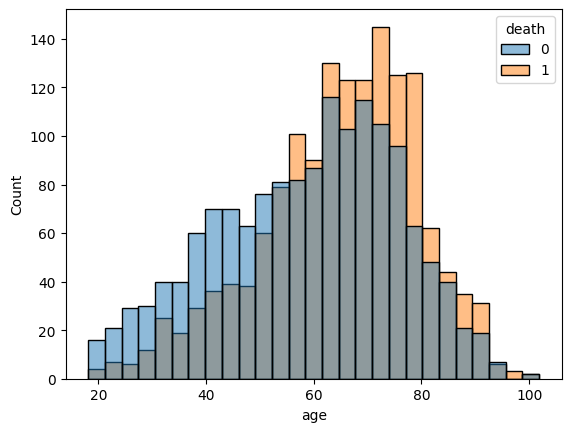

In [29]:
sns.histplot(data=pd.concat([age_died, age_lived]), x='age', hue='death')

## One-way ANOVA for difference between continuous and categorical variable

### Difference in patient's discharge time based on disease category

**Null hypothesis (H0)**: There is no significant difference in patient's discharge time based on disease category.  
**Alternative hypothesis (H1)**: There is a significant difference in patient's discharge time based on disease category.

In [30]:
slos_cancer = support_df[support_df['dzclass'] == 'Cancer']
slos_copd = support_df[support_df['dzclass'] == 'COPD/CHF/Cirrhosis']
slos_arf = support_df[support_df['dzclass'] == 'ARF/MOSF']
slos_coma = support_df[support_df['dzclass'] == 'Coma']
len(slos_cancer), len(slos_copd), len(slos_arf), len(slos_coma)

(636, 1650, 2555, 323)

In [31]:
sample_size = 300
slos_cancer = slos_cancer.sample(sample_size)
slos_copd = slos_copd.sample(sample_size)
slos_arf = slos_arf.sample(sample_size)
slos_coma = slos_coma.sample(sample_size)
slos_cancer['slos'].mean(), slos_copd['slos'].mean(), slos_arf['slos'].mean(), slos_coma['slos'].mean()

(8.753333333333334, 10.81, 21.393333333333334, 18.4)

In [32]:
stats.f_oneway(slos_cancer['slos'], slos_copd['slos'], slos_arf['slos'], slos_coma['slos'])

F_onewayResult(statistic=51.380802885987784, pvalue=3.0824238960232265e-31)

The test yields a p-value of **3.08e-31**, which is **extremely small**, indicating very strong evidence against the null hypothesis. So we can **reject the null hypothesis** and conclude that there is a statistically **significant difference in patient's discharge time based on disease category**.

<Axes: xlabel='slos', ylabel='Count'>

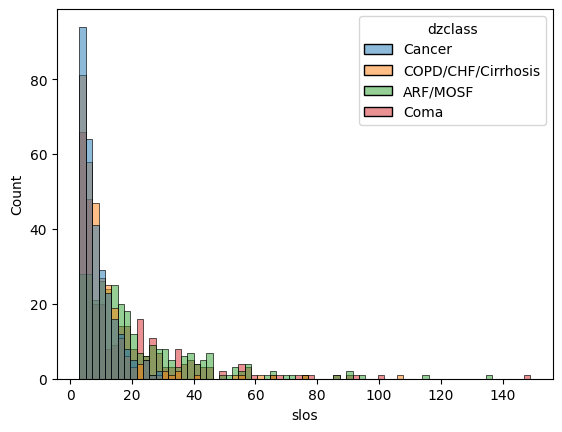

In [33]:
sns.histplot(data=pd.concat([slos_cancer, slos_copd, slos_arf, slos_coma]), x='slos', hue='dzclass')

<Axes: xlabel='slos', ylabel='Count'>

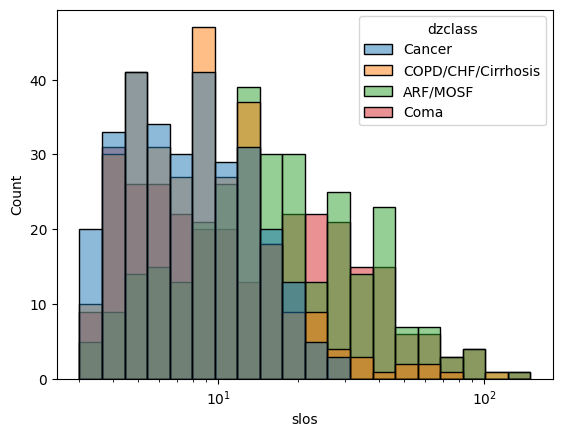

In [34]:
sns.histplot(data=pd.concat([slos_cancer, slos_copd, slos_arf, slos_coma]), x='slos', hue='dzclass', log_scale=True)

<Axes: xlabel='slos', ylabel='Count'>

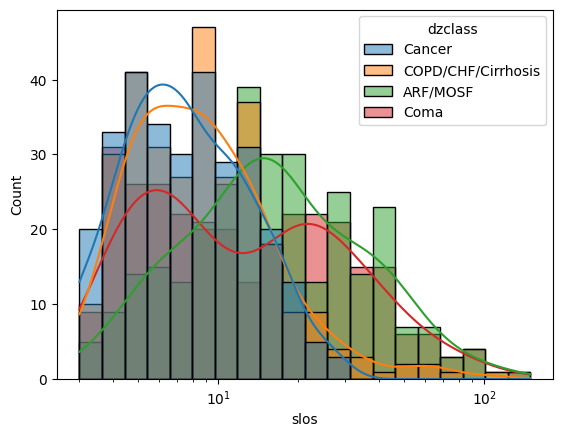

In [35]:
sns.histplot(data=pd.concat([slos_cancer, slos_copd, slos_arf, slos_coma]), x='slos', hue='dzclass', log_scale=True, kde=True)

# Visualization

In [36]:
support_df['death'].value_counts()/len(support_df['death'])*100

death
1    63.884586
0    36.115414
Name: count, dtype: float64

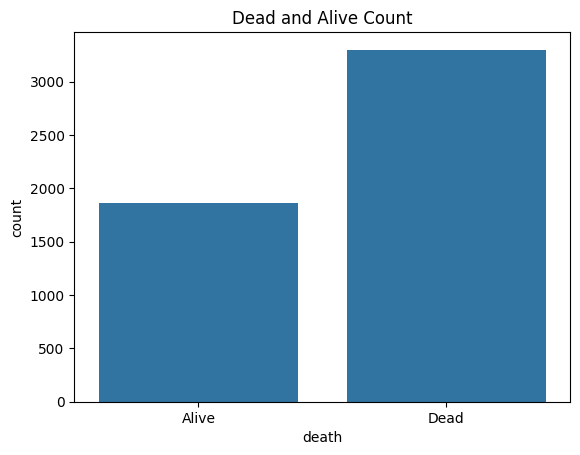

In [37]:
sns.countplot(data=support_df, x='death')
plt.title("Dead and Alive Count")
plt.xticks([0, 1], ['Alive', 'Dead'])
plt.show()

**Obeservation**: Samples of dead patients is more than alive patients. Data is **unbalanced**.

## Relation between Days of follow-up and death

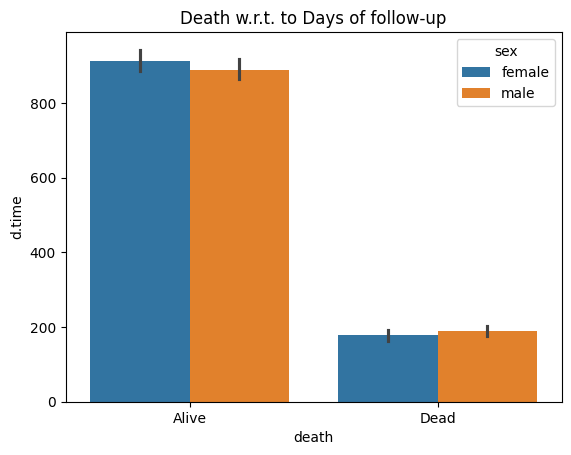

In [38]:
sns.barplot(data=support_df, x='death', y='d.time', hue='sex')
plt.title("Death w.r.t. to Days of follow-up")
plt.xticks([0, 1], ['Alive', 'Dead'])
plt.show()

**Obeservation**: From the plot, it looks like the Day of follow-up has a direct relationship with Death. But it's obvious that dead people can't visit the hospital. Data leakage?

## Relation between race and disease category

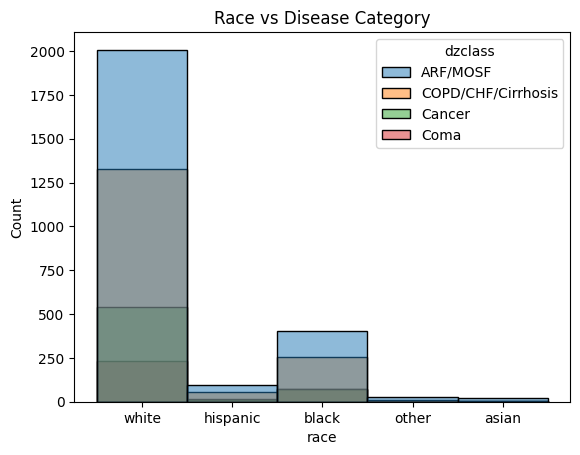

In [39]:
sns.histplot(data=support_df, x="race", hue="dzclass")
plt.title('Race vs Disease Category')
plt.show()

**Obeservation**: The plot does not provide conclusive insights, as the sample size of white individuals is significantly larger than that of other groups. Bias Data?? 

## Relation between age and death in hospital

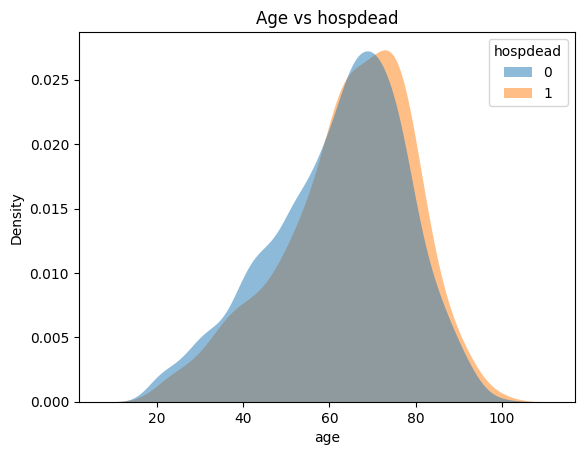

In [40]:
sns.kdeplot(data=support_df, x="age", hue="hospdead", fill=True, common_norm=False, alpha=.5, linewidth=0)
plt.title('Age vs hospdead')
plt.show()

**Obeservation**: There is some relationship between age and Death in the hospital. Use statistical test?

## Relation between Days of follow-up and Level of functional disability

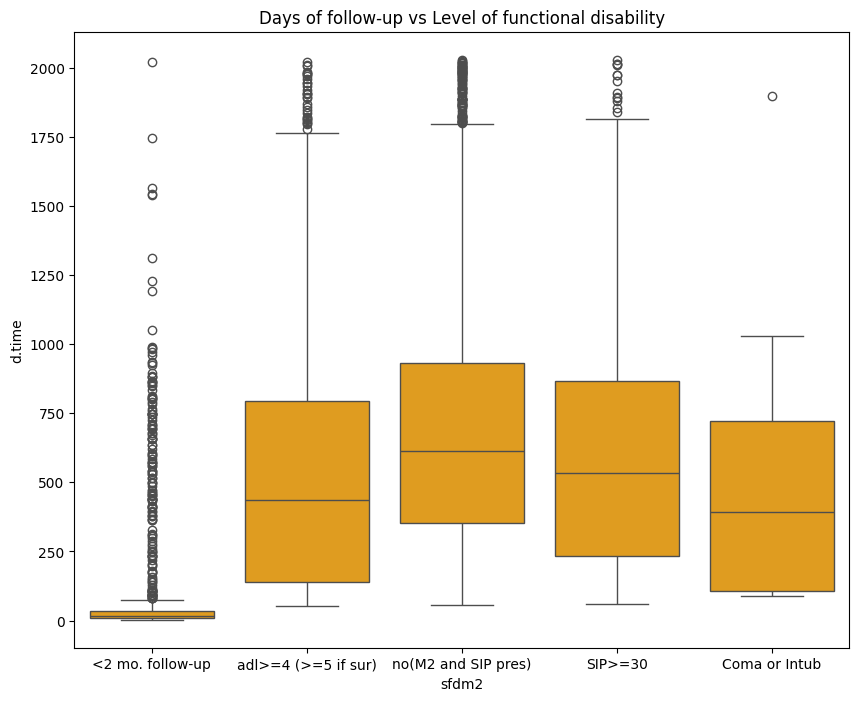

In [41]:
fig = plt.figure(figsize=(10, 8))
sns.boxplot(data=support_df, x="sfdm2", y="d.time", color='orange')
plt.title('Days of follow-up vs Level of functional disability')
plt.show()

**Obeservation**: There is no relationship between Study Entry to Discharge and Level of functional disability

## Is Physician’s estimate reliable?

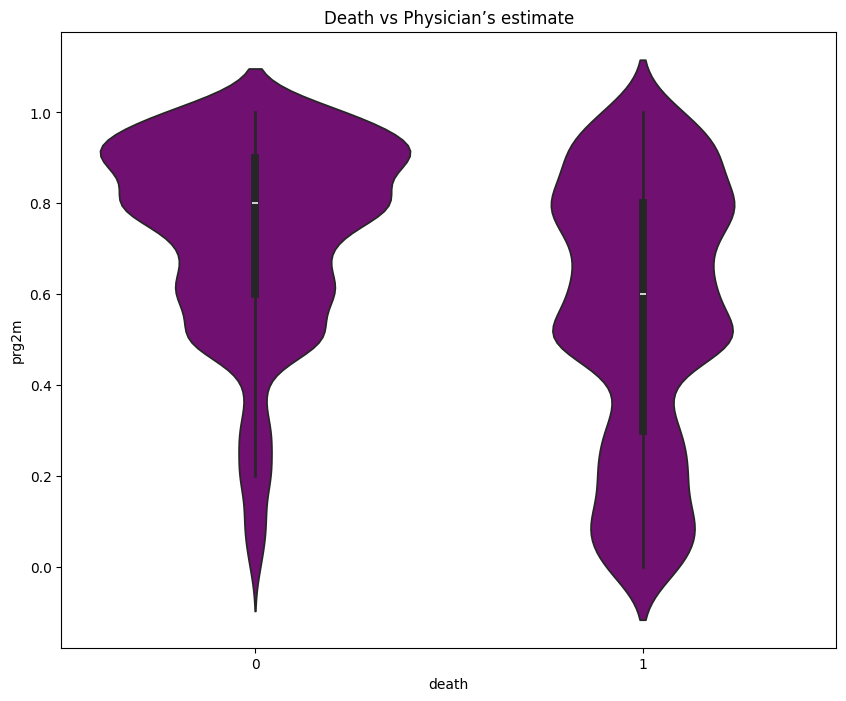

In [42]:
fig = plt.figure(figsize=(10, 8))
sns.violinplot(data=support_df, x="death", y="prg2m", color='purple')
plt.title('Death vs Physician’s estimate')
plt.show()

**Obeservation**: Physian's estimation about death are somewhat reliable but it should be take with grain of salt.

## Pairplots

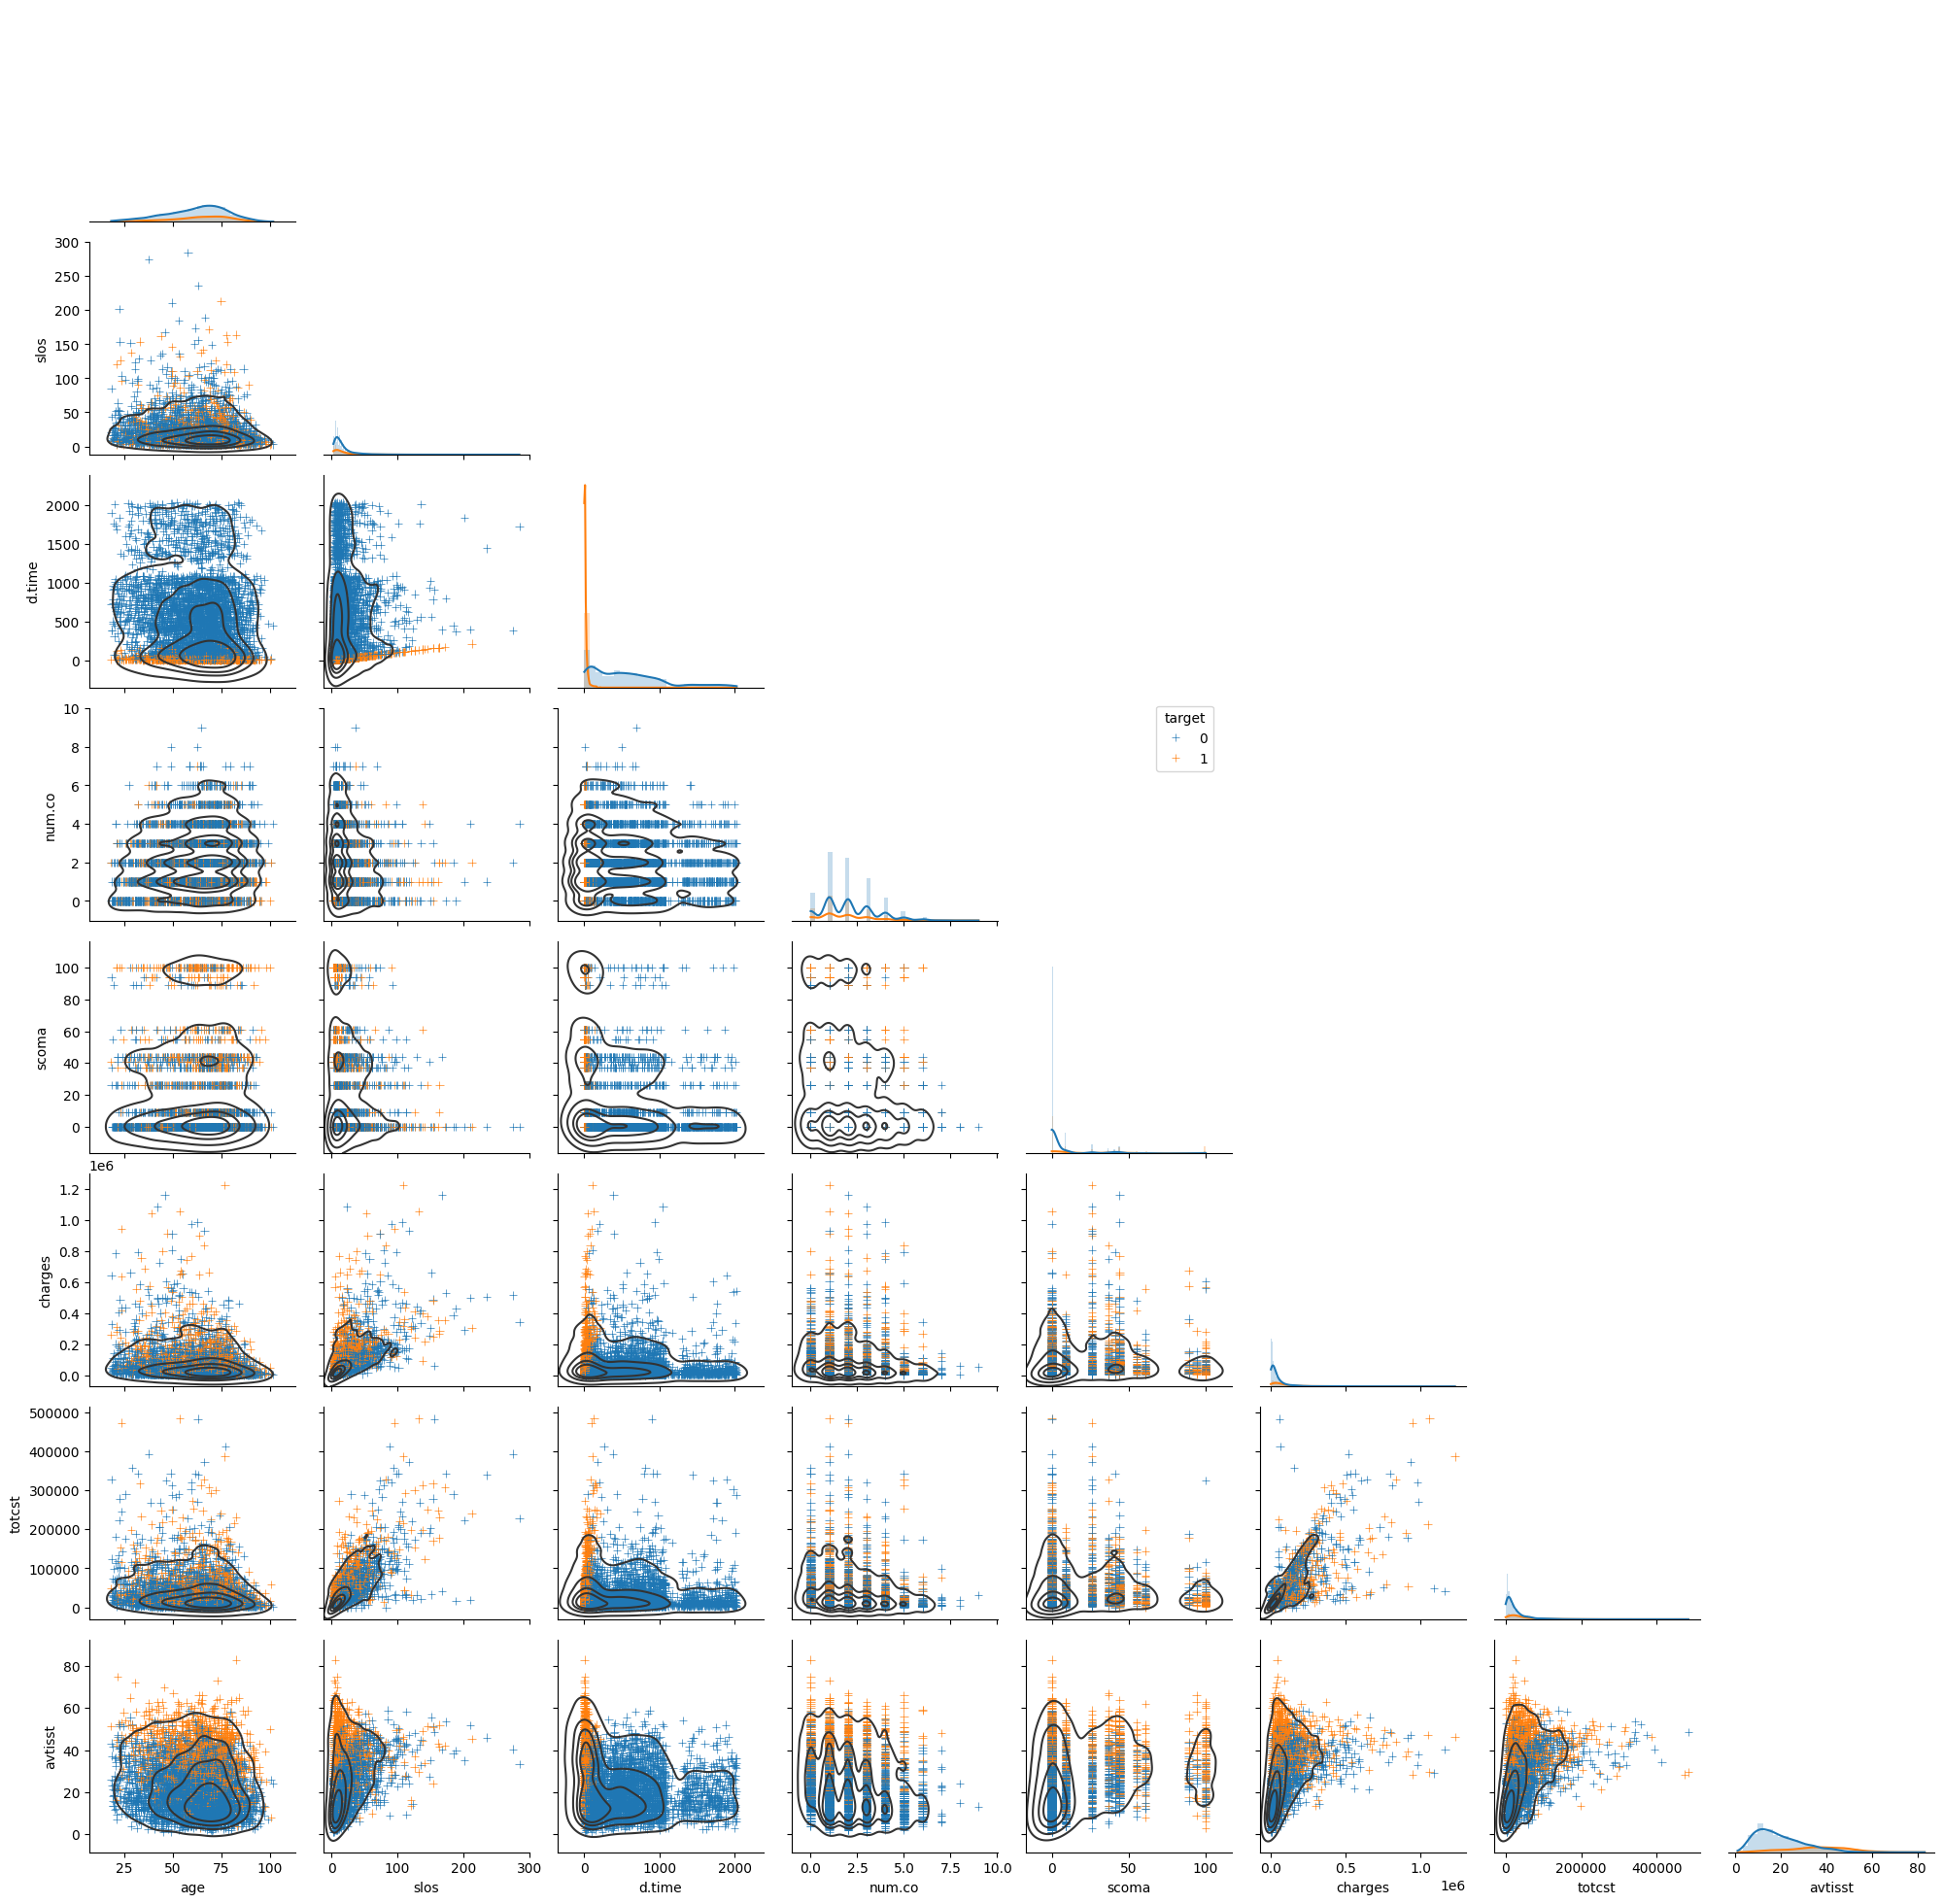

In [43]:
support_pair_plot_df = support_df[quantitative_cols].iloc[:, :8].copy()
support_pair_plot_df['target'] = support_df['hospdead']
g = sns.PairGrid(support_pair_plot_df, hue='target', corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

# Data Encoding

## Qualitative Data

### Label Encoding

Label encoding converts categorical data into numbers, assigning each category a unique value starting from 0. While simple, this method can introduce unintended priority issues during model training, as higher numbers may imply greater importance. For example, dzgrop has ARF/MOSF w/Sepsis, CHF, COPD as categories. Assigning them 0, 1 and 2 respectively might suggest that priority of COPD is higher then CHF or ARF/MOSF w/Sepsis which is not true. 

### One-hot Encoding

In [44]:
support_df = pd.get_dummies(support_df, columns=['dzclass'], dtype=int)

In [45]:
support_df.head()

,age,death,sex,hospdead,slos,d.time,dzgroup,num.co,edu,scoma,...,resp,temp,crea,sod,sfdm2,adlsc,dzclass_ARF/MOSF,dzclass_COPD/CHF/Cirrhosis,dzclass_Cancer,dzclass_Coma
18,63.66299,1,female,1,14,14,ARF/MOSF w/Sepsis,0,22.0,26.0,...,22.0,36.69531,2.899902,130.0,<2 mo. follow-up,0.0,1,0,0,0
23,49.61298,0,female,0,50,2019,ARF/MOSF w/Sepsis,1,12.0,0.0,...,48.0,38.89844,0.599976,130.0,adl>=4 (>=5 if sur),5.0,1,0,0,0
26,53.84000,1,male,0,7,1064,COPD,1,12.0,0.0,...,22.0,37.89844,0.799927,141.0,no(M2 and SIP pres),4.0,0,1,0,0
32,55.73199,0,male,0,13,2012,Cirrhosis,2,8.0,0.0,...,18.0,37.39844,0.799927,117.0,SIP>=30,6.0,0,1,0,0
48,44.84900,1,female,0,12,229,MOSF w/Malig,2,10.0,0.0,...,32.0,37.09375,0.799927,136.0,no(M2 and SIP pres),0.0,1,0,0,0


One-hot encoding increases dimensionality by creating a column for each category, leading to **complexity, sparsity, and slower training**. It can also cause overfitting with **many categories and small sample sizes**. While effective, it should be used cautiously, with alternatives like ordinal or **binary encoding** considered to avoid these issues.

### Binary Encoding

In [46]:
encoder = ce.BinaryEncoder(cols=['dzgroup'], return_df=True)
support_df = encoder.fit_transform(support_df)
support_df.head()

,age,death,sex,hospdead,slos,d.time,dzgroup_0,dzgroup_1,dzgroup_2,dzgroup_3,...,resp,temp,crea,sod,sfdm2,adlsc,dzclass_ARF/MOSF,dzclass_COPD/CHF/Cirrhosis,dzclass_Cancer,dzclass_Coma
18,63.66299,1,female,1,14,14,0,0,0,1,...,22.0,36.69531,2.899902,130.0,<2 mo. follow-up,0.0,1,0,0,0
23,49.61298,0,female,0,50,2019,0,0,0,1,...,48.0,38.89844,0.599976,130.0,adl>=4 (>=5 if sur),5.0,1,0,0,0
26,53.84000,1,male,0,7,1064,0,0,1,0,...,22.0,37.89844,0.799927,141.0,no(M2 and SIP pres),4.0,0,1,0,0
32,55.73199,0,male,0,13,2012,0,0,1,1,...,18.0,37.39844,0.799927,117.0,SIP>=30,6.0,0,1,0,0
48,44.84900,1,female,0,12,229,0,1,0,0,...,32.0,37.09375,0.799927,136.0,no(M2 and SIP pres),0.0,1,0,0,0


Binary encoding is a memory-efficient method that **reduces dimensionality** by converting categories into binary codes. However, Binary encoding may imply **false relationships** between categories and lead to **information loss**, reducing model performance. It can also be challenging for some models to handle, making results **harder to interpret**.

### Hash Encoding

In [47]:
encoder = ce.HashingEncoder(cols=['race'], n_components=2, return_df=True)
support_df = encoder.fit_transform(support_df)
support_df.head()

,col_0,col_1,age,death,sex,hospdead,slos,d.time,dzgroup_0,dzgroup_1,...,resp,temp,crea,sod,sfdm2,adlsc,dzclass_ARF/MOSF,dzclass_COPD/CHF/Cirrhosis,dzclass_Cancer,dzclass_Coma
18,1,0,63.66299,1,female,1,14,14,0,0,...,22.0,36.69531,2.899902,130.0,<2 mo. follow-up,0.0,1,0,0,0
23,1,0,49.61298,0,female,0,50,2019,0,0,...,48.0,38.89844,0.599976,130.0,adl>=4 (>=5 if sur),5.0,1,0,0,0
26,1,0,53.84000,1,male,0,7,1064,0,0,...,22.0,37.89844,0.799927,141.0,no(M2 and SIP pres),4.0,0,1,0,0
32,1,0,55.73199,0,male,0,13,2012,0,0,...,18.0,37.39844,0.799927,117.0,SIP>=30,6.0,0,1,0,0
48,1,0,44.84900,1,female,0,12,229,0,1,...,32.0,37.09375,0.799927,136.0,no(M2 and SIP pres),0.0,1,0,0,0


Hash encoding reduces the number of features compared to one-hot encoding, offering a more compact representation while **retaining some information** about the original variable. However, hashing to fewer dimensions can lead to **information loss**. Another challenge is **collision**, where multiple values are mapped to the same hash value to the reduced dimensionality.

### Frequency/Mean Encoding

In [48]:
support_df['ca'] = support_df['ca'].map(support_df['ca'].value_counts(normalize=True))
support_df['ca'].head()

18    0.676026
23    0.676026
26    0.676026
32    0.676026
48    0.148335
Name: ca, dtype: float64

Frequency encoding, or count encoding, replaces each category in a variable with its occurrence **count/frequency** in the dataset. This approach captures how often each category appears, indirectly helping the model learn its relationship with the target variable. However, it can lead to **overfitting** and potential **data leakage**, so validating the model's performance on unseen data is crucial to ensure generalizability.

### Target Encoding ???

## Quantitative Data

### Min-Max Normalization

In [49]:
scaler = MinMaxScaler(feature_range=(-1, 1))
support_df['age'] = scaler.fit_transform(support_df['age'].to_numpy().reshape(-1, 1))
support_df.head()

,col_0,col_1,age,death,sex,hospdead,slos,d.time,dzgroup_0,dzgroup_1,...,resp,temp,crea,sod,sfdm2,adlsc,dzclass_ARF/MOSF,dzclass_COPD/CHF/Cirrhosis,dzclass_Cancer,dzclass_Coma
18,1,0,0.087891,1,female,1,14,14,0,0,...,22.0,36.69531,2.899902,130.0,<2 mo. follow-up,0.0,1,0,0,0
23,1,0,-0.247716,0,female,0,50,2019,0,0,...,48.0,38.89844,0.599976,130.0,adl>=4 (>=5 if sur),5.0,1,0,0,0
26,1,0,-0.146747,1,male,0,7,1064,0,0,...,22.0,37.89844,0.799927,141.0,no(M2 and SIP pres),4.0,0,1,0,0
32,1,0,-0.101554,0,male,0,13,2012,0,0,...,18.0,37.39844,0.799927,117.0,SIP>=30,6.0,0,1,0,0
48,1,0,-0.361511,1,female,0,12,229,0,1,...,32.0,37.09375,0.799927,136.0,no(M2 and SIP pres),0.0,1,0,0,0


Min-max scaling normalizes feature values to a **specific range**, typically, by using the minimum and maximum values of the feature. It is useful when features have different scales. However, it is sensitive to **outliers** and works best when the data distribution is unknown. Min-max scaling is ideal for algorithms requiring features within a specific range, such as neural networks and support vector machines.

### Z-score Normalization

In [50]:
scaler = StandardScaler()
support_df['slos'] = scaler.fit_transform(support_df['slos'].to_numpy().reshape(-1, 1))
support_df.head()

,col_0,col_1,age,death,sex,hospdead,slos,d.time,dzgroup_0,dzgroup_1,...,resp,temp,crea,sod,sfdm2,adlsc,dzclass_ARF/MOSF,dzclass_COPD/CHF/Cirrhosis,dzclass_Cancer,dzclass_Coma
18,1,0,0.087891,1,female,1,-0.192326,14,0,0,...,22.0,36.69531,2.899902,130.0,<2 mo. follow-up,0.0,1,0,0,0
23,1,0,-0.247716,0,female,0,1.523900,2019,0,0,...,48.0,38.89844,0.599976,130.0,adl>=4 (>=5 if sur),5.0,1,0,0,0
26,1,0,-0.146747,1,male,0,-0.526036,1064,0,0,...,22.0,37.89844,0.799927,141.0,no(M2 and SIP pres),4.0,0,1,0,0
32,1,0,-0.101554,0,male,0,-0.239999,2012,0,0,...,18.0,37.39844,0.799927,117.0,SIP>=30,6.0,0,1,0,0
48,1,0,-0.361511,1,female,0,-0.287672,229,0,1,...,32.0,37.09375,0.799927,136.0,no(M2 and SIP pres),0.0,1,0,0,0


Standard scaling, also known as standardization, adjusts features to have a mean of 0 and a standard deviation of 1 using mean deviation and standard deviation. It lacks a **fixed range** and is **less sensitive to outliers**. This method is best suited for normally distributed data and is commonly used with algorithms like k-means clustering, linear regression, and logistic regression.

### Logarithmic Transformation

In [51]:
support_df['d.time'] = np.log(support_df['d.time'])
support_df.head()

,col_0,col_1,age,death,sex,hospdead,slos,d.time,dzgroup_0,dzgroup_1,...,resp,temp,crea,sod,sfdm2,adlsc,dzclass_ARF/MOSF,dzclass_COPD/CHF/Cirrhosis,dzclass_Cancer,dzclass_Coma
18,1,0,0.087891,1,female,1,-0.192326,2.639057,0,0,...,22.0,36.69531,2.899902,130.0,<2 mo. follow-up,0.0,1,0,0,0
23,1,0,-0.247716,0,female,0,1.523900,7.610358,0,0,...,48.0,38.89844,0.599976,130.0,adl>=4 (>=5 if sur),5.0,1,0,0,0
26,1,0,-0.146747,1,male,0,-0.526036,6.969791,0,0,...,22.0,37.89844,0.799927,141.0,no(M2 and SIP pres),4.0,0,1,0,0
32,1,0,-0.101554,0,male,0,-0.239999,7.606885,0,0,...,18.0,37.39844,0.799927,117.0,SIP>=30,6.0,0,1,0,0
48,1,0,-0.361511,1,female,0,-0.287672,5.433722,0,1,...,32.0,37.09375,0.799927,136.0,no(M2 and SIP pres),0.0,1,0,0,0


### Root Transformation

In [52]:
support_df['totcst'] = np.sqrt(support_df['totcst'])
support_df['totcst'].describe()

count    5164.000000
mean      150.032442
std        90.621504
min         0.000000
25%        82.203901
50%       130.503165
75%       189.386714
max       695.382089
Name: totcst, dtype: float64

# Outlier Identification and Removal???

# Assignment
## Objective:
This assignment aims to critically analyze the representation of groups in a dataset, identify potential biases, and evaluate the implications for decision-making. You will use statistical methods and visualizations to assess the distribution of samples and discuss their impact on conclusions drawn from the data.

## Instructions:
1. Dataset Overview:

    * Select a dataset containing categorical and numerical features (Minimum 10 categorical and numerical features. Minimum 30 features total).
    * Provide a summary of the dataset, focusing on the representation of each group.

2. Data Analysis:

    * Perform descriptive analysis to show the distribution of samples across the groups.
    * Create visualizations, as shown in the session or better.
    * Use statistical methods to assess whether the representation is proportionate and sufficient for analysis.

3. Problem Identification:

    * From the dataset, identify instances with bias or data leakage issues.
    * Discuss why such issues might hinder meaningful conclusions.

4. Impact of Imbalance:

    * Discuss how the overrepresentation of certain groups may bias conclusions.
    * Provide specific examples of how this imbalance can mislead or skew results.

5. Propose feature encoding method based on analysis:

    * Suggest an encoding method for each feature based on analysis.
    * Discuss how this method impacts model training.

6. Conclusion:

    * Summarize your findings and provide recommendations for improving data quality and analysis.
  
## Deliverables:
1. Dataset summary.
2. Problem identification and analysis.
3. Visualizations.
4. Discussion of results.
5. Recommendations and ethical considerations.

## Bonus Challenge (Optional):
1. Use chi-square test, to assess whether the observed distribution of groups is significantly different from an expected distribution. Include this in your report if applicable.

2. Train a simple ML model with all features and same model after applying encoding method. Show performace evaluation.